In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
df = pd.read_csv('lathe_data.csv')

In [3]:
df.head()

,id,aspect_ratio,diameter,height_ratio,sphericity,symmetry_concave,symmetry_hull,symmetry_total,thickness,unmachinable,volume_ratio,is_lathe
0,000F33B,0.998937,0.027770,0.262133,0.704972,0.082373,0.016658,0.077877,0.073696,0.0,0.851336,0
1,000F338,0.998933,0.137490,0.838039,0.599673,0.588811,0.299687,0.322491,0.114130,0.0,0.744771,1
2,000F6B5,1.000000,0.218750,0.607143,0.430536,0.246141,0.306953,0.237236,0.092391,0.0,0.487447,1
3,000FA5F,1.000000,0.023241,0.176930,0.394737,0.169292,0.040343,0.163450,0.091379,0.0,0.481881,0
4,000FE53,0.999450,0.162325,0.714975,0.697322,0.654993,0.473506,0.523874,0.157938,0.0,0.833627,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 12 columns):
id                  181 non-null object
aspect_ratio        181 non-null float64
diameter            181 non-null float64
height_ratio        181 non-null float64
sphericity          181 non-null float64
symmetry_concave    181 non-null float64
symmetry_hull       181 non-null float64
symmetry_total      181 non-null float64
thickness           181 non-null float64
unmachinable        181 non-null float64
volume_ratio        181 non-null float64
is_lathe            181 non-null int64
dtypes: float64(10), int64(1), object(1)
memory usage: 17.0+ KB


In [5]:
y = df.is_lathe

In [6]:
X = df.iloc[:,1:-1]

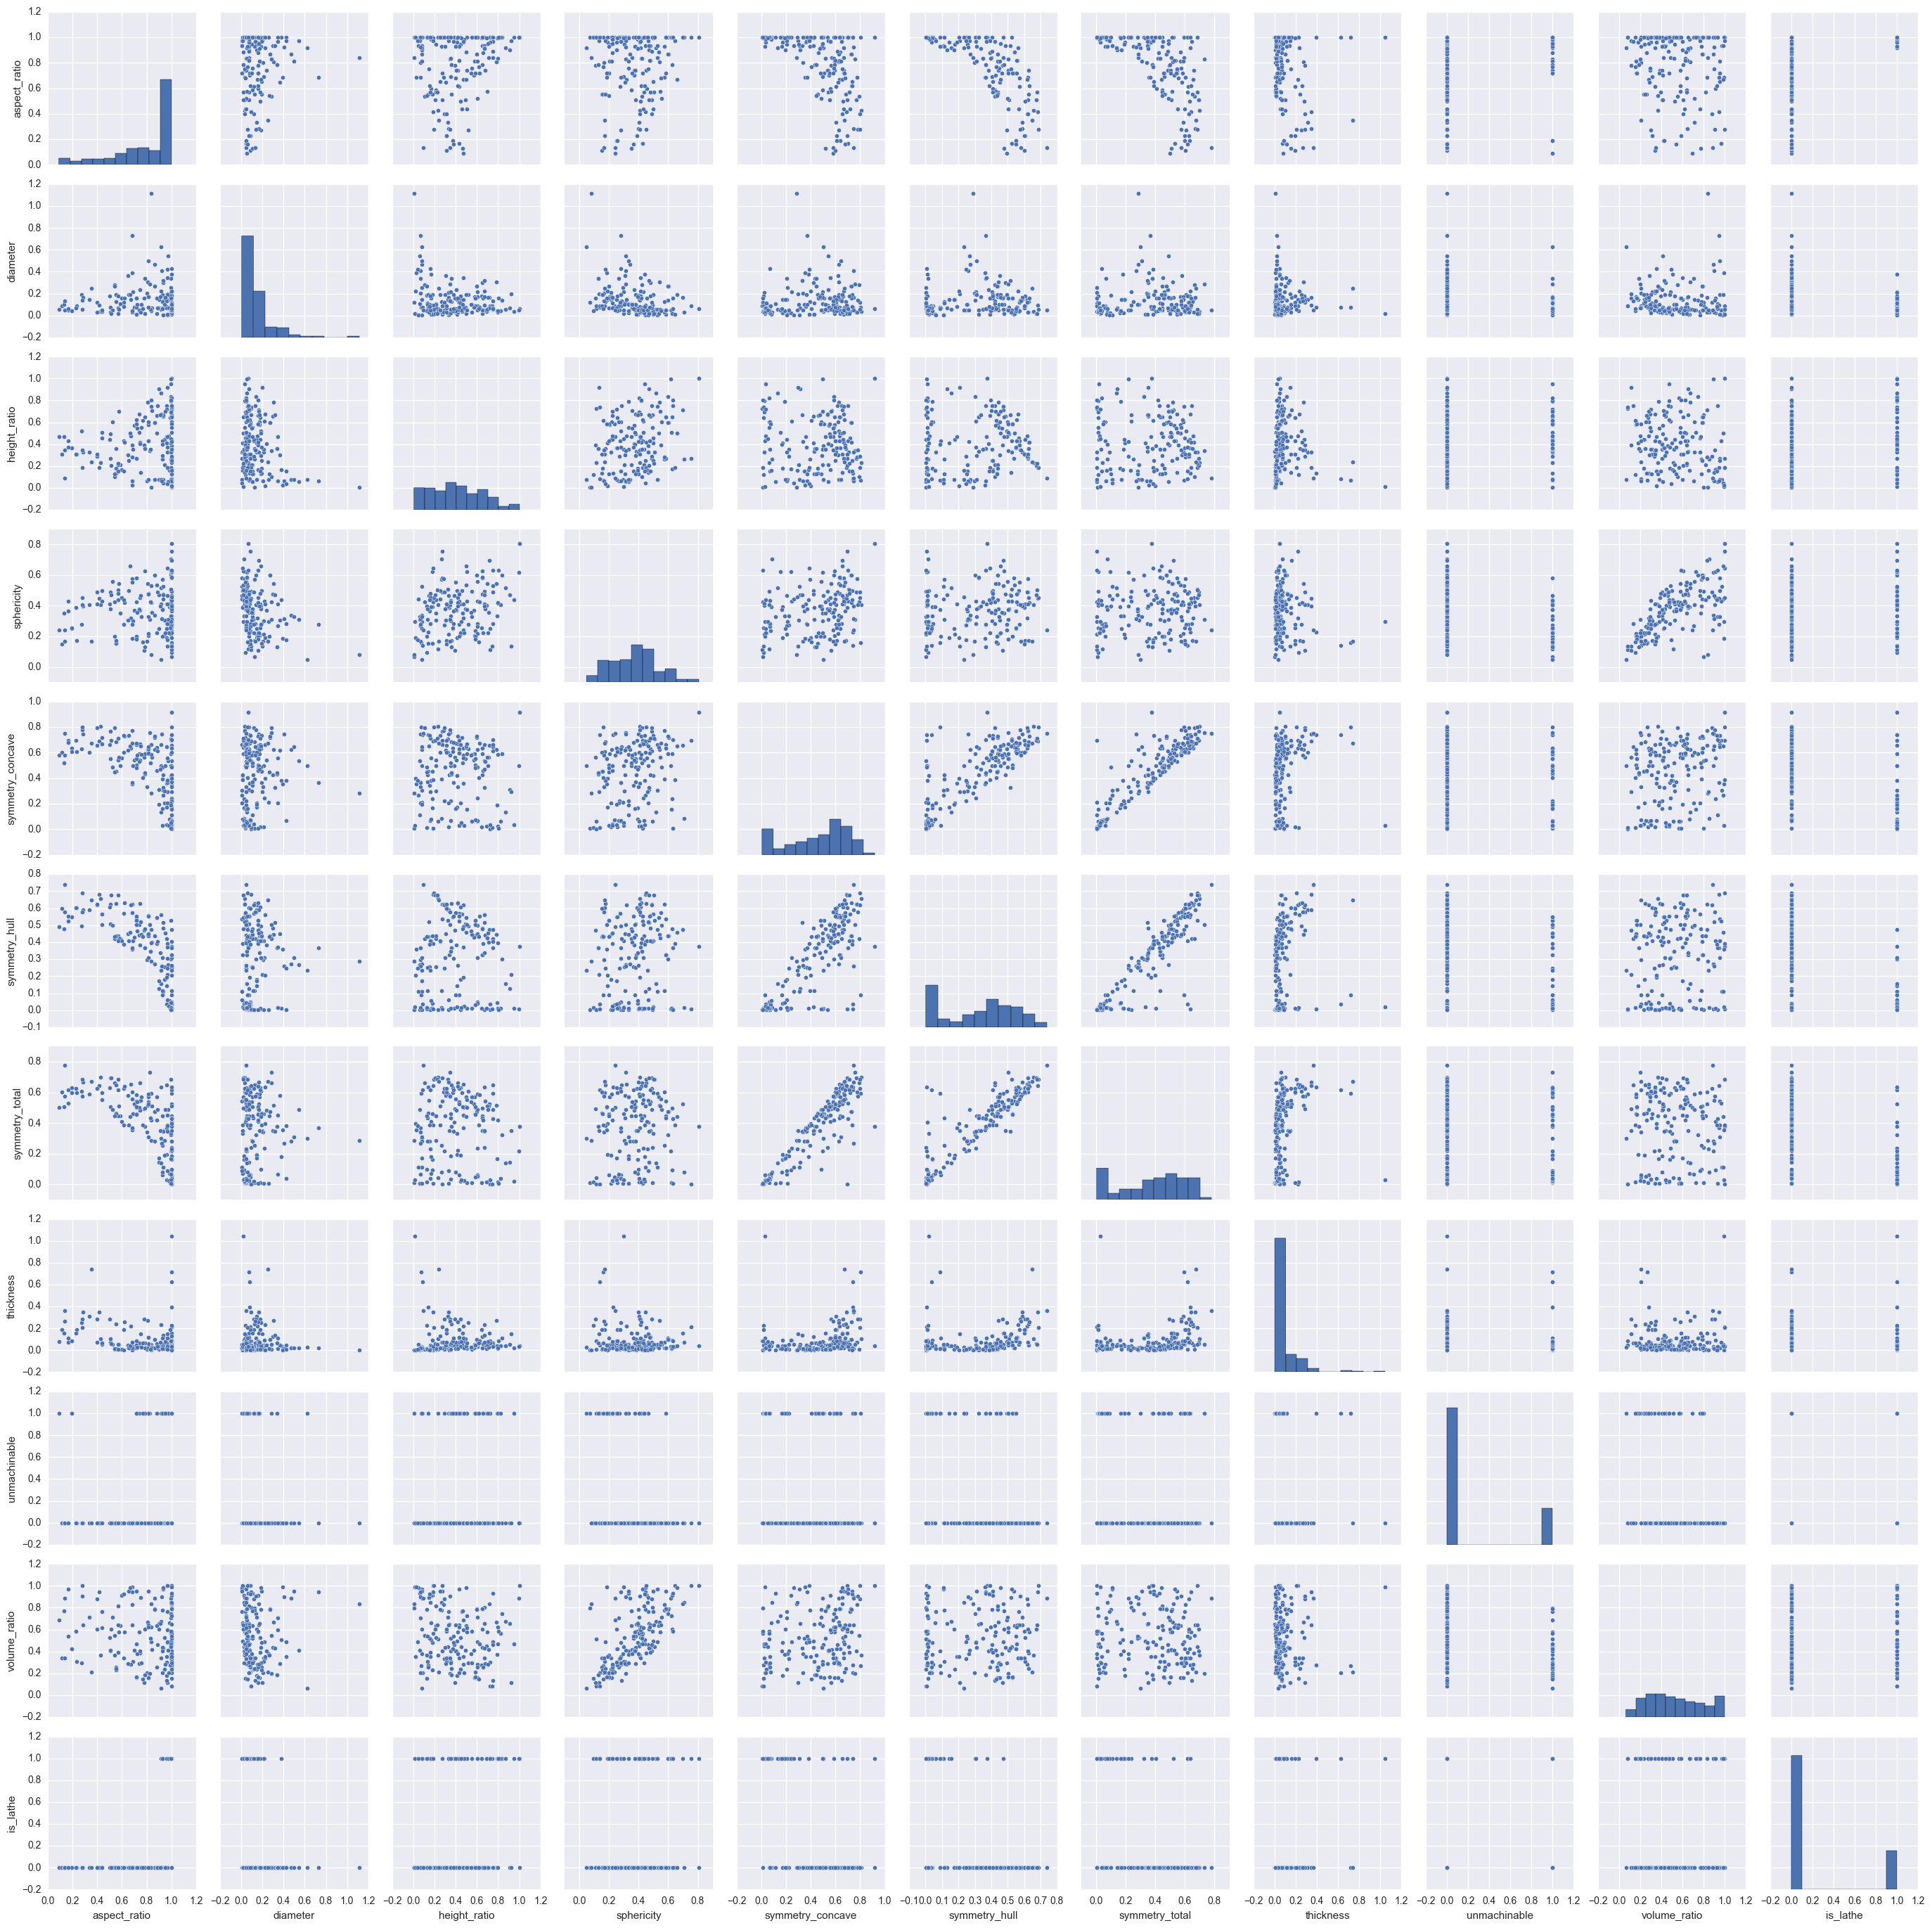

In [7]:
sns.pairplot(df)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 7)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))
feats = sorted(list(zip(X.columns, clf.feature_importances_)), key = lambda x: x[1], reverse = True)
printmd('**Feature Importances**')
for a in feats:
    print('{}: {}'.format(a[0], round(a[1], 4)))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96        35
          1       0.90      0.82      0.86        11

avg / total       0.93      0.93      0.93        46



**Feature Importances**

symmetry_hull: 0.2139
symmetry_total: 0.1886
symmetry_concave: 0.1289
aspect_ratio: 0.1224
height_ratio: 0.0847
sphericity: 0.0766
thickness: 0.0712
diameter: 0.0586
volume_ratio: 0.0515
unmachinable: 0.0036


**We see that the feature importances from the Random Forest classifier closely resemble the order of correlations between *is_lathe* and the feature columns below:**

In [9]:
np.abs(df.corr()['is_lathe']).sort_values(ascending=False)[1:]

symmetry_hull       0.641064
symmetry_total      0.619463
symmetry_concave    0.557577
aspect_ratio        0.427490
diameter            0.219610
unmachinable        0.207166
height_ratio        0.191472
sphericity          0.082175
thickness           0.071643
volume_ratio        0.043135
Name: is_lathe, dtype: float64